genera un mapa de bits de todas las señales de estudio en un tramo de la carretera especificado

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import obspy
from PIL import Image

In [22]:
#vamos a cargar los archivos
root_folder = "Z:/DAS/2021-11-30_Medidas"

#list all .mat files in the folder
import glob
files = glob.glob(root_folder + "/*.mat")
filesall = files
#take only the first n files
#files = files[0:2]
print(files)

#load all files
import scipy.io
data = [scipy.io.loadmat(file) for file in files]

['Z:/DAS/2021-11-30_Medidas\\medida_211130_11_55_19.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_00_18.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_05_19.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_10_25.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_15_43.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_20_33.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_25_22.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_31_59.mat', 'Z:/DAS/2021-11-30_Medidas\\medida_211130_12_36_52.mat']


In [24]:
#concat al Fp
Fp = np.concatenate([d['Fp'] for d in data])
print(Fp.shape)
FpMax = np.max(np.abs(Fp))
print(FpMax)


(144000, 1160)
7.629980174700343


In [15]:
#downsample Fp taking the mean of every 4 samples of shape[0]
Fp = Fp.reshape(-1, 4, Fp.shape[1]).mean(axis=1)
print(Fp.shape)


(8000, 1160)


In [16]:
#autoscale Fp to +1 and -1
Fp1 = Fp / np.max(np.abs(Fp))
#sum 1 to get 0 centered
Fp1 = Fp1 + 1
#convert +1 -1 signal to 16 bit image with 0 centered
Fp16 = (Fp1 * 32767).astype(np.uint16)
#save as 16 bit single channel grayscale png
# Crear una imagen a partir del array
img = Image.fromarray(Fp16, mode='I;16')
# Guardar la imagen
img.save('Fp16.png')



print(Fp16.shape)
#print aspect ratio
print(Fp16.shape[1] / Fp16.shape[0])




(8000, 1160)
0.145


In [28]:
#foreach file in filesall downsample and convert to png
for file in filesall:
    print(file)
    data = scipy.io.loadmat(file)
    Fp = data['Fp']    
    Fp = Fp.reshape(-1, 4, Fp.shape[1]).mean(axis=1)
    #Fp[Fp>1] = 1
    #Fp[Fp<-1] = -1
    np.clip(Fp, -1, 1, out=Fp)
    #Fp1 = Fp / np.max(np.abs(Fp))
    Fp1 = Fp + 1
    Fp16 = (Fp1 * 32767).astype(np.uint16)
    img = Image.fromarray(Fp16, mode='I;16')
    img.save(file + '.png')

Z:/DAS/2021-11-30_Medidas\medida_211130_11_55_19.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_00_18.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_05_19.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_10_25.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_15_43.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_20_33.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_25_22.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_31_59.mat
Z:/DAS/2021-11-30_Medidas\medida_211130_12_36_52.mat


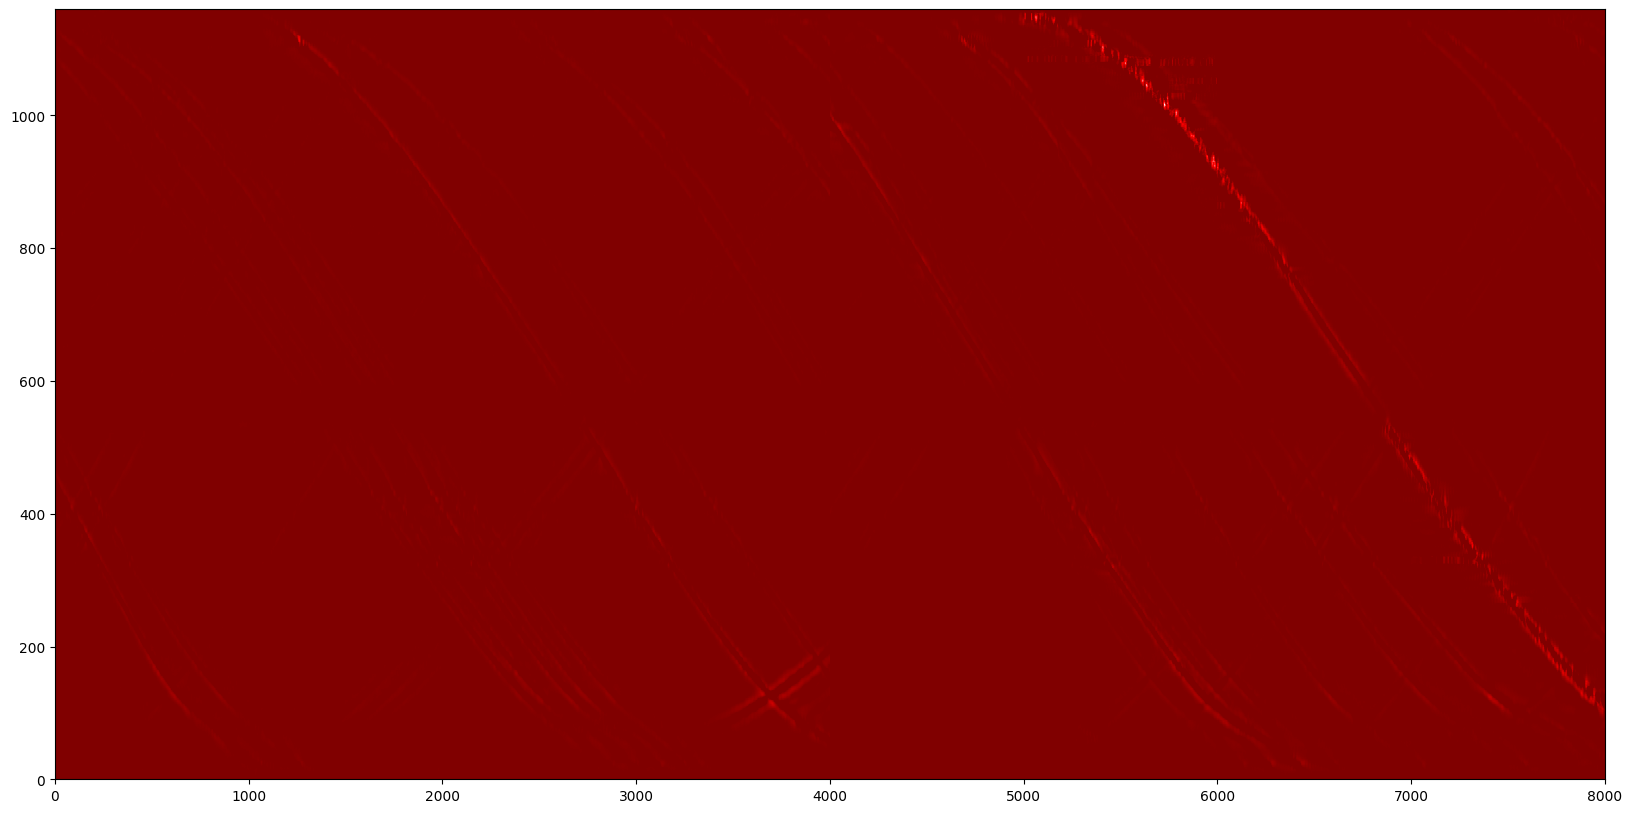

In [19]:
#plot Fp1 as pcolormesh with a colormap that enhances the contrast
plt.figure(figsize=(20, 10))
plt.pcolormesh(Fp1.T, cmap='seismic', vmin=-1, vmax=1)
